# Multimodal Data Fusion - Exercise 3 - Data Alignment


In this exercise, we will take a closer look at the alignment of (multimodal) data in spatial, temporal, and semantic domains as well as radiometric normalization of calibrating the scale of variables. You will be learning about __spatial alignment__ with __image registration__, __temporal alignment__ with __dynamic time warping__ of time-series data, __semantical aligment__ of different data sources with __clustering methods__ for __image segmentation__, and __data normalization__ having different scales.

## Learning goals 

After this exercise, you should  

- get familiar with different data alignment types and techniques in multimodal data fusion
- be able to estimate of mutual information for spatial alignment / image registration
- be able to apply dynamic time-warping for temporal aligment of time-series
- be able to use k-means multi-modal image segmentation. 
- be able to normalize data in different ways


## Relevant Lecture

Lecture 4

## Relevant Sections in course book

Chapters 5, 6, 7, and 8

## Additional Material 

* Visualization and plotting with [matplotlib](https://matplotlib.org)
* Image processing with [scikit-image](https://scikit-image.org)
* Dynamic time warping with [simpledtw](https://github.com/talcs/simpledtw)
* scikit-learn page on [k-means](https://scikit-learn.org/stable/modules/clustering.html#k-means)


## Output Hints
Below are the output plots for each task and output values for relevant task

|Problem 1.1|Problem 1.2|
|:-----------------------------:|:-----------------------------:|
| <img src="./images/task1.1.png" /> | <img src="./images/task1.2.png" /> |

|Problem 1.3|Problem 1.5|
|:-----------------------------:|:-----------------------------:|
| <img src="./images/task1.3.png" /> | <img src="./images/task1.5.png" />|

|Problem 2.1| 
|:-----------------------------:|
| <img src="./images/task2.1.png" /> Cost: (6.428572992508663, 25.78906643723184, 51.367616886673986)|

| |Problem 2.2| |
|:-----------------------------:|:-----------------------------:|:-----------------------------:|
| <img src="./images/task2.1.1.png" /> | <img src="./images/task2.1.2.png" /> | <img src="./images/task2.1.3.png" /> |

|Problem 3.1|Problem 3.2|
|:-----------------------------:|:-----------------------------:|
| <img src="./images/task3.1.png" /> | <img src="./images/task3.2.png" />|

|Problem 3.3| 
|:-----------------------------:|
| <img src="./images/task3.3.png" /> |





# Tutorial

## Loading and processing images

<a id='ImageDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Image processing with scikit-image.  
    
The code below reads image from the file, rotates it, transforms to different color space, and finally plot the result images. Run the code and get yourself familiar with libraries and functions ([skimage.transform]( https://scikit-image.org/docs/stable/api/skimage.transform.html?highlight=transform#module-skimage.transform) and [skimage.color](https://scikit-image.org/docs/stable/api/skimage.color.html?highlight=color#module-skimage.color)). Install scikit-image library, if you have not done yet.

</div>

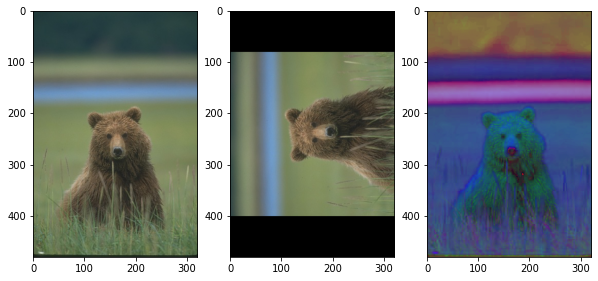

In [1]:
import numpy as np
import matplotlib.image as image
import matplotlib.pyplot as plt
from skimage.transform import rotate
from skimage.color import rgb2hsv

# loading image
img = image.imread('bear1.jpg')
# rotating image 90 degrees
img_rotated = rotate(img, 90)
# transform color space from RGB to HSV
img_hsv = rgb2hsv(img)

# display resulting images
f = plt.figure(figsize=(10,5))
f.add_subplot(1,3,1)
plt.imshow(img)
f.add_subplot(1,3,2)
plt.imshow(img_rotated)
f.add_subplot(1,3,3)
plt.imshow(img_hsv)

## Plotting historams

<a id='HistogramDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Calculating and visualizing histograms.  
    
The code below reads image from the file, transforms it to gray scale, calculates histograms. Run the code and get yourself familiar with 1D and 2D histograms ([matplotlib.pyplot.hist](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html) and [numpy.histogram2d](https://numpy.org/doc/stable/reference/generated/numpy.histogram2d.html)). Study what does these 1D and 2D histograms means in image context. 

</div>

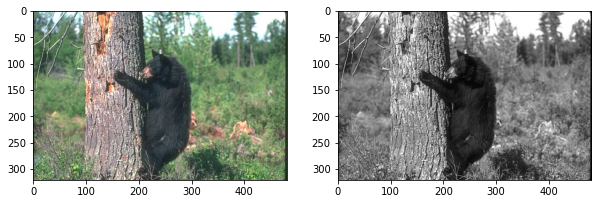

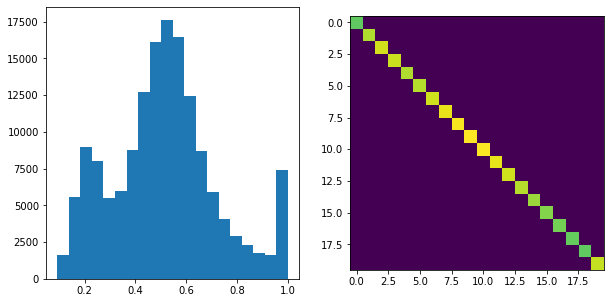

In [2]:
from skimage.color import rgb2gray
# loading image
img = image.imread('bear2.jpg')
# transform to gray scale
img_gray = rgb2gray(img)

# display images
f1 = plt.figure(figsize=(10,10))
f1.add_subplot(1,2,1)
h1 = plt.imshow(img)
f1.add_subplot(1,2,2)
h1 = plt.imshow(img_gray, cmap=plt.get_cmap('gray'))
plt.show()

# calculate and plot images and 1D/2D histogram using 20 bins
nbins = 20
f2 = plt.figure(figsize=(10,5))
f2.add_subplot(1,2,1)
hist1d = plt.hist(img_gray.flatten(), bins=nbins)
f2.add_subplot(1,2,2)
hist2d = np.histogram2d(img_gray.flatten(), img_gray.flatten(), bins=nbins)[0]
nz = hist2d > 0
hist2d[nz] = np.log(hist2d[nz])
plt.imshow(hist2d, interpolation='nearest')

## Dynamic time warping

<a id='DTWDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Dynamic time warping between time-series.  
    
The code below generate two univariate time-series and then match them using Dynamic time warping (DTW) method. Run the code and get yourself familiar with DTW [simpledtw](https://github.com/talcs/simpledtw). Study how DTW works and what are the inputs and outputs in dtw()-function. Outputs are also visualized in next code snippet.
</div>

### DTW: toy example

In [3]:
import simpledtw

ts1 = np.array([4, 3.5, 3.7, 4, 4.4, 5, 6, 6.5]) # 1st time-series
ti1 = np.array(range(0, len(ts1))) # time indices
ts2 = np.array([2, 2.7, 2.5, 4.5, 5, 5.7]) # 2nd time-series
ti2 = np.array(range(2, len(ts1))) # time indices
matches, cost, mapping1, mapping2, matrix = simpledtw.dtw(np.array([ti1, ts1]).T, np.array([ti2,ts2]).T) # calcute DTW distance between time-series
print('Distance (warping cost):', cost)
print('Dynamic programming matrix:\n', matrix)
print('Mapping 1', mapping1)
print('Mapping 2', mapping2)

Distance (warping cost): 11.153179524695364
Dynamic programming matrix:
 [[ 2.82842712  6.09798367 10.36998554 15.39492335 21.47768588 28.68115727]
 [ 4.63120276  4.98249305  8.14477071 12.26787633 17.48802959 23.87864771]
 [ 6.33120276  6.04541632  7.31487381 10.41970874 14.62565691 20.01082172]
 [ 8.56727074  7.34541632  7.84819196  9.37642662 12.53870428 16.88496704]
 [11.69137061  9.31772462  9.24541632  8.85317952 10.94124083 14.21079737]
 [15.9340113  12.36567475 11.93799873  9.35317952  9.85317952 11.97214153]
 [21.59086555 16.82549537 15.9691276  11.15595516 10.35317952 10.89721018]
 [28.31767757 22.34274106 20.9691276  13.98438229 12.15595516 11.15317952]]
Mapping 1 [[0], [0], [1], [2], [3], [3], [4], [5]]
Mapping 2 [[0, 1], [2], [3], [4, 5], [6], [7]]


### DTW: plotting the results

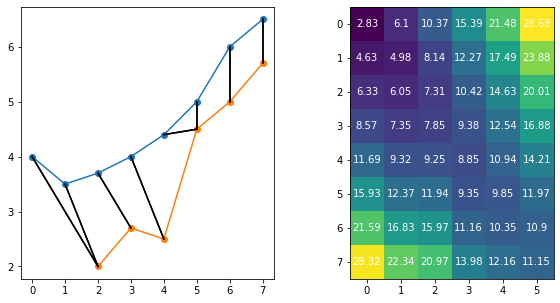

In [4]:
f = plt.figure(figsize=(10,5))
f.add_subplot(1,2,1)

# plot data
plt.plot(ti1, ts1, '-o')
plt.plot(ti2, ts2, '-o')

# plot connections between points
for i, indices in enumerate(mapping1):
    for j in indices:
        plt.plot([ti1[i],ti2[j]],[ts1[i],ts2[j]], 'k')

for i, indices in enumerate(mapping2):
    for j in indices:
        plt.plot([ti1[j],ti2[i]],[ts1[j],ts2[i]], 'k')  

# plot dp matrix
ax = f.add_subplot(1,2,2)
ax.imshow(matrix) 
for i in range(matrix.shape[0]):
    for j in range(matrix.shape[1]):
        text = ax.text(j, i, np.round(matrix[i, j], 2),
                       ha="center", va="center", color="w")

plt.show()

## K-means clustering

<a id='KmeansDemo'></a>
<div class=" alert alert-info">
    <b>Tutorial.</b> Clustering with k-means algorithm.  

The code below defines k-means clustering algorithm and applied it to syntetic 2D data. Run the code and study how k-means works ([sklearn.cluster.Kmeans](https://scikit-learn.org/stable/modules/clustering.html#k-means)), what are the inputs and outputs of kmeans_clustering()-function, how can you interpret the result of toy example.

</div>

In [5]:
from sklearn.cluster import KMeans

def kmeans_clustering(X, k=3, maximum_iterations=200):
    n, d = X.shape    # number of examples n and number of features d
    cluster_centers = np.zeros((k,d))    # Store the resulting clustering centers in the rows of this k x d matrix
    cluster_labels = np.zeros(n)    # Store here the resulting n cluster indices / labels (assigned for each example)

    k_means = KMeans(n_clusters = k, max_iter = maximum_iterations).fit(X)  # Fit k-means with k clusters and using max_iter maximum iterations
    cluster_centers = k_means.cluster_centers_  # cluster centers
    cluster_indices = k_means.labels_  # cluster label indices for each example
    return cluster_centers, cluster_indices

### K-means: toy example

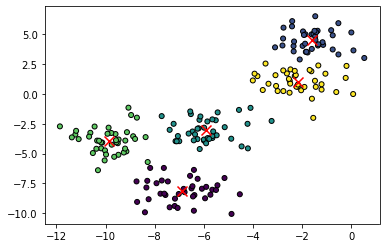

In [6]:
from sklearn.datasets import make_blobs

# generate 2D clusters with 5 centers
X, y = make_blobs(n_samples=200, centers=5, n_features=2, random_state=1)

# fit k-means fit 5 clusters
cluster_means, cluster_indices = kmeans_clustering(X, k = 5)

# visualize data and clustering results
plt.scatter(X[:, 0], X[:, 1], marker='o', c=cluster_indices,
            s=25, edgecolor='k')
plt.scatter(cluster_means[:,0], cluster_means[:,1], marker='x', s=100, color = 'r')

# -----------------------------------------------------------------------

# Assignments

## 1. Spatial Alignment: mutual Information for image registration

###  Introduction

In this assigment, we will take a look at mutual information between two images. Take look at first part of the Lecture 4 (spatial alignment). Also, Chapter 5 in course book is relevant.

### The image data

The image data here are from two different magnetic resonance imaging sources ('T1-weighted-MRI.jpg', and 'T2-weighted-MRI.jpg'). Task is to transform the images and calculate mutual information based on the joint histogram.


<a id='Task1.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.1. 

<p> 1) Complete the code below to rotate second MRI image 't2_img' by 45 degrees. </p>
<p> 2) Visualize original images and the resulting rotated image.</p>

</div>

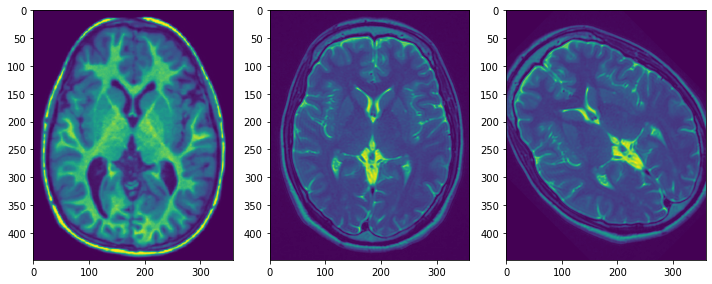

In [7]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
from skimage.transform import rotate

# load MRI images ('T1-weighted-MRI.jpg' and T2-weighted-MRI.jpg) as pixel array
t1_img = image.imread('T1-weighted-MRI.jpg')
t2_img = image.imread('T2-weighted-MRI.jpg')

# rotate image 't2_img' by 45 degrees
t2_img_45 = rotate(t2_img, 45)

# display all 3 array of pixels as an image
fig, axs = plt.subplots(1, 3, figsize=(10,10))
axs[0].imshow(t1_img)
axs[1].imshow(t2_img)
axs[2].imshow(t2_img_45)
fig.tight_layout()

### 1D Histograms

<a id='Task1.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.2. 

<p> 1) Calculate and plot 1D histograms of three images above using 20 histogram bins. </p>
<p> 2) Compare the results. What can you say about histograms? </p>

    
</div>

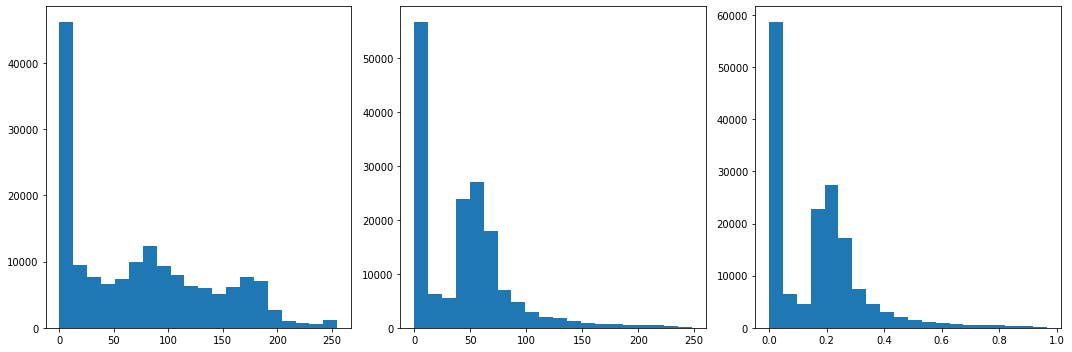

In [8]:
# plot histograms
nbins = 20

t1_img_gray = rgb2gray(t1_img)
t2_img_gray = rgb2gray(t2_img)
t2_img_gray_45 = rgb2gray(t2_img_45)
# print(t2_img_gray_45.flatten())
fig, axs = plt.subplots(1,3, figsize=(15,5))
axs[0].hist(t1_img_gray.flatten(), bins=nbins)
axs[1].hist(t2_img_gray.flatten(), bins=nbins)
axs[2].hist(t2_img_gray_45.flatten(), bins=nbins)
fig.tight_layout()

2) Your answer here

### 2D Histograms

<a id='Task1.3'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.3. 

<p>1) Calculate and plot 2D histograms of images below using 20 histogram bins (interpolation='nearest'). </p>
<p>2) Compare the results. What can you say about 2D histograms compared to 1D histtograms above? </p>
    
</div>

[0.28688947 0.05914722 0.04719866 0.0410817  0.04537474 0.06152949
 0.07693978 0.05767071 0.04946306 0.03873665 0.0370182  0.03172013
 0.03796738 0.0474158  0.04340193 0.0170481  0.0064892  0.00429304
 0.00344932 0.00716541]


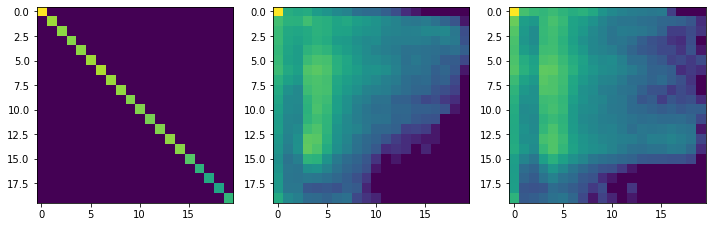

In [9]:
nbins = 20

# Plot three histogram between
    # 't1_img' and 't1_img'
    # 't1_img' and 't2_img'
    # 't1_img' and 't2_img_45'


hist2d_t1_t1 = np.histogram2d(t1_img_gray.flatten(), t1_img_gray.flatten(), bins=nbins)[0]
hist2d_t1_t2 = np.histogram2d(t1_img_gray.flatten(), t2_img_gray.flatten(), bins=nbins)[0]
hist2d_t1_t2_45 = np.histogram2d(t1_img_gray.flatten(), t2_img_gray_45.flatten(), bins=nbins)[0]
kakka = hist2d_t1_t1/np.sum(hist2d_t1_t1)
print(np.sum(kakka, axis=0))

nz_t1_t1 = hist2d_t1_t1 > 0
hist2d_t1_t1[nz_t1_t1] = np.log(hist2d_t1_t1[nz_t1_t1])

nz_t1_t2 = hist2d_t1_t2 > 0
hist2d_t1_t2[nz_t1_t2] = np.log(hist2d_t1_t2[nz_t1_t2])

nz_t1_t2_45 = hist2d_t1_t2_45 > 0
hist2d_t1_t2_45[nz_t1_t2_45] = np.log(hist2d_t1_t2_45[nz_t1_t2_45])

fig, axs = plt.subplots(1,3, figsize=(10,10))
axs[0].imshow(hist2d_t1_t1, interpolation= 'nearest')
axs[1].imshow(hist2d_t1_t2, interpolation= 'nearest')
axs[2].imshow(hist2d_t1_t2_45, interpolation= 'nearest')
fig.tight_layout()

2) Your answer here

### Mutual information of histograms

<a id='Task1.4'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.4. 

<p>Complete the code below to calculate and return mutual information of joint 2D histogram.
    Mutual information is defined as:
    \begin{equation*}
        MI(X;Y) = \sum_{y \in Y} \sum_{x \in X} p(x,y) log\bigg(\frac{p(x,y)}{p(x)p(y)}\bigg)
    \end{equation*}
    Also relevant material can be found from Lecture 4 (pages 5-8)
    </p> 
    
</div>

In [10]:
def mutual_information(hgram):
    """ Mutual information for joint histogram
    """
    # Convert bins counts to probability values
    pxy = hgram/np.sum(hgram)
#     print(pxy)
    # calculate marginal for x over y
    px = np.sum(pxy, axis=0)
#     print(px)
    # calculate marginal for y over x
    py = np.sum(pxy, axis=1)
#     print(py)
    # Broadcast to multiply marginals
    px_py = px*py
#     print(px_py)
    ## Now we can do the calculation using the probability values (pxy) and mutiplied marginals (px_py) 2D arrays
    # hint: Only non-zero pxy values contribute to the sum
    
    mi = np.sum(pxy * np.log(pxy/px_py), where = pxy>0)
    return mi

mutual_information(hist2d_t1_t1)

<ipython-input-10-8e18d63ad8bc>:19: RuntimeWarning: divide by zero encountered in log
  mi = np.sum(pxy * np.log(pxy/px_py), where = pxy>0)
<ipython-input-10-8e18d63ad8bc>:19: RuntimeWarning: invalid value encountered in multiply
  mi = np.sum(pxy * np.log(pxy/px_py), where = pxy>0)


2.9880095545552234

### Rotated images and mutual information

<a id='Task1.5'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 1.5. 

<p>Complete the code below to calculate mutual information for rotated images using your solution. </p>
<p> 1) Generate 18 more rotated images of 't2_img' in the range of -45 to +45 degrees with increament of 5 degrees. </p>
<p> 2) Compute histograms between first mri image ('t1_img') and rotated images. </p> 
<p> 3) Calculate mutual information for each of these histograms (using function implemented above). </p>
<p> 4) plot the mutual infomation values as function of rotation angles. </p>
<p> 5) In which angle mutual information is maximized? and why? </p>
    
</div>

<ipython-input-10-8e18d63ad8bc>:19: RuntimeWarning: divide by zero encountered in log
  mi = np.sum(pxy * np.log(pxy/px_py), where = pxy>0)
<ipython-input-10-8e18d63ad8bc>:19: RuntimeWarning: invalid value encountered in multiply
  mi = np.sum(pxy * np.log(pxy/px_py), where = pxy>0)


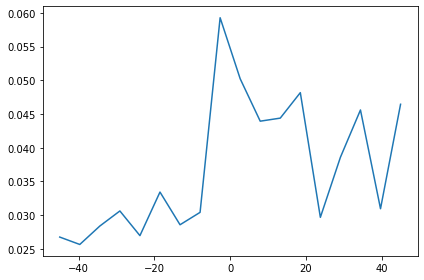

In [11]:
# generate 18 more rotated images of 't2_img' in the range of -45 to +45 degrees with increament of 5 degrees
rotated_images = [] # == save rotated images

labels = [] # == save angles of rotation for corresponding image
## Your code here
labels = np.linspace(-45,45,18)
rotated_images = [rotate(t2_img, angle) for angle in labels]
# plt.imshow(rotated_images[0])
# compute histograms between t1_img and all rotated t2_img ('rotated_images')
histograms = [] # == save histograms
## Your code here

for image in rotated_images:
    histogram = np.histogram2d(t1_img_gray.flatten(), rgb2gray(image).flatten(), bins=20)[0]
    nz = histogram>0
    histogram[nz] = np.log(histogram[nz])
    histograms.append(histogram)
# fig, axs = plt.subplots(1,2)
# axs[0].imshow(histograms[0], interpolation='nearest')
# axs[1].imshow(histograms[17], interpolation='nearest')

# calculate mutual information of each histogram
mi = []
## Your code here
mi = [mutual_information(histogram) for histogram in histograms]
# plot mutual information of rotated images 

fig, ax = plt.subplots()
ax.plot(labels, mi)
fig.tight_layout()

5) Your answer here

## 2. Temporal Alignment: Dynamic Time Warping

### Introduction

In this assigment, [simpledtw](https://github.com/talcs/simpledtw) libarary is used to calculate the dynamic time warping. This lirary can direclty imported from the exercise folder. Get familiai with the library (if not done yet) and compelte the tasks below. For the background, take a look at second part of Lecture 4 (temporal aligment). Also, Chapter 6. in course book

### Hand gesture times series data

In this assignment, example of hand gestures recorded with wearable IMU devices are used to study DTW. This dataset includes multi-dimensional measurements but mean of 3-exis acceleration sensor is used as a time-series.

<a id='Task2.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 2.1. 

<p> Complete the code below to calculate DTW-based similarity between reference (reference_gesture) and unknown (gesture1, gesture2, gesture3) gestures.</p>
<p> 1) Plot all four gestures. </p>
<p> 2) Calculate DTW similarity between reference and unknown gestures (use code from tutorial above).</p>
<p> 3) Print warping cost between reference and unknown gestures. </p>
<p> 4) Which one of the unkown gestures belong to same class as the reference gesture? Why? </p>
</div>

Distance (warping cost_1): 6.428572992508663
Distance (warping cost_2): 25.78906643723184
Distance (warping cost_3): 51.367616886673986


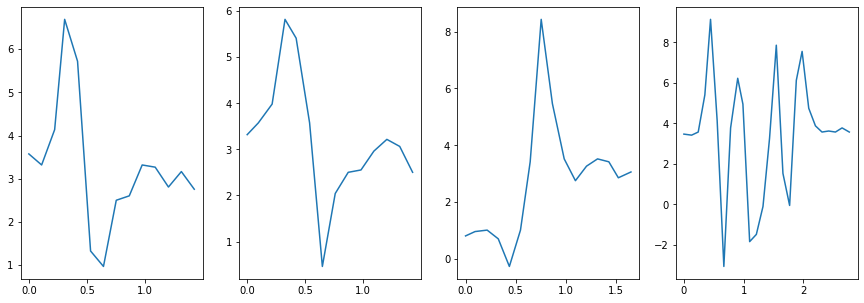

In [12]:
import simpledtw
import numpy as np

# load data
g1_1 = np.genfromtxt('gesture1.txt', delimiter=' ')
g1_2 = np.genfromtxt('gesture2.txt', delimiter=' ')
g2_1 = np.genfromtxt('gesture3.txt', delimiter=' ')
g2_2 = np.genfromtxt('gesture4.txt', delimiter=' ')

# pickup time-stamps and mean feature
reference_gesture = np.array([(g1_1[:,0]-g1_1[0,0])/1000.0, np.mean(g1_1[:, 3:6], axis=1)])
gesture1 = np.array([(g1_2[:,0]-g1_2[0,0])/1000.0, np.mean(g1_2[:, 3:6], axis=1)])
gesture2 = np.array([(g2_1[:,0]-g2_1[0,0])/1000.0, np.mean(g2_1[:, 3:6], axis=1)])
gesture3 = np.array([(g2_2[:,0]-g2_2[0,0])/1000.0, np.mean(g2_2[:, 3:6], axis=1)])

# Plot all four gestures
fig1, axs1 = plt.subplots(1,4, figsize=(15,5))
axs1[0].plot(reference_gesture[0], reference_gesture[1])
axs1[1].plot(gesture1[0], gesture1[1])
axs1[2].plot(gesture2[0], gesture2[1])
axs1[3].plot(gesture3[0], gesture3[1])
fig.tight_layout()
# calculate DTW similarity between reference and unknown gestures
matches_1, cost_1, mapping_1_1, mapping_2_1, matrix_1 = simpledtw.dtw(reference_gesture.T, gesture1.T)
matches_2, cost_2, mapping_1_2, mapping_2_2, matrix_2 = simpledtw.dtw(reference_gesture.T, gesture2.T)
matches_3, cost_3, mapping_1_3, mapping_2_3, matrix_3 = simpledtw.dtw(reference_gesture.T, gesture3.T)


# print warping cost between reference and unknown gestures
print('Distance (warping cost_1):', cost_1)
print('Distance (warping cost_2):', cost_2)
print('Distance (warping cost_3):', cost_3)

4) gesture 1 as it produces the smallest cost, which makes it the most similar to the reference gesture and most likely to belong in the same class.

<a id='Task2.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 2.2. 

<p> 1) Plot mappings (ie., warpings) between reference (reference_gesture) and unknown (gesture1, gesture2, gesture3) gestures. </p>
<p> 2) Compare the results. What can be said about the mappings?</p>
</div>

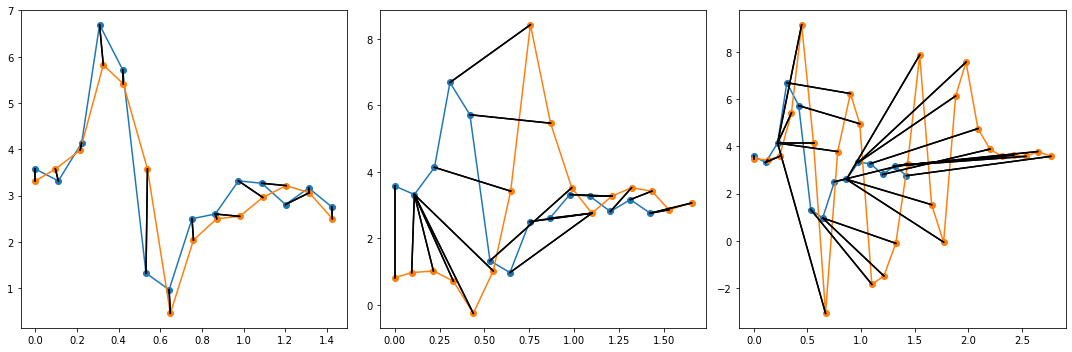

In [37]:
# Plot mapping
fig, axs = plt.subplots(1,3, figsize = (15,5))
#plot data
axs[0].plot(reference_gesture[0], reference_gesture[1], '-o')
axs[0].plot(gesture1[0], gesture1[1], '-o')
axs[1].plot(reference_gesture[0], reference_gesture[1], '-o')
axs[1].plot(gesture2[0], gesture2[1], '-o')
axs[2].plot(reference_gesture[0], reference_gesture[1], '-o')
axs[2].plot(gesture3[0], gesture3[1], '-o')
#plot connections between points
for i, indices in enumerate(mapping_1_1) :
    for j in indices:
        axs[0].plot([reference_gesture[0][i],gesture1[0][j]],[reference_gesture[1][i],gesture1[1][j]], 'k')
for i, indices in enumerate(mapping_2_1) :
    for j in indices:
        axs[0].plot([reference_gesture[0][j],gesture1[0][i]],[reference_gesture[1][j],gesture1[1][i]], 'k')
        
for i, indices in enumerate(mapping_1_2) :
    for j in indices:
        axs[1].plot([reference_gesture[0][i],gesture2[0][j]],[reference_gesture[1][i],gesture2[1][j]], 'k')
for i, indices in enumerate(mapping_2_2) :
    for j in indices:
        axs[1].plot([reference_gesture[0][j],gesture2[0][i]],[reference_gesture[1][j],gesture2[1][i]], 'k')

for i, indices in enumerate(mapping_1_3) :
    for j in indices:
        axs[2].plot([reference_gesture[0][i],gesture3[0][j]],[reference_gesture[1][i],gesture3[1][j]], 'k')
for i, indices in enumerate(mapping_2_3) :
    for j in indices:
        axs[2].plot([reference_gesture[0][j],gesture3[0][i]],[reference_gesture[1][j],gesture3[1][i]], 'k')


fig.tight_layout()

2) Your answer here

## 3. Semantic Alignment: Clustering

### Introduction

In this assignment, k-means clustering ensembles are used to segment color image. Different color spaces are formed and clustered independently in pixed level. The results are then fused using another k-means applied to joint feature presentation formed from the identity vectors of individual algorithms. For the background, take a look at third part of Lecture 4 (semantic alignment). Also, Chapter 7. in course book.

### Image transforms to different color spaces

<a id='Task3.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3.1. 

<p> 1) Complete the code below to transform input image to different color spaces of RGB, HSV, LAB, YUV, XYZ, LUV using the methods in <a href = "https://scikit-image.org"> scikit-image library </a> </p>
<p> 2) Plot all six images (original and transformed). </p>

</div>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


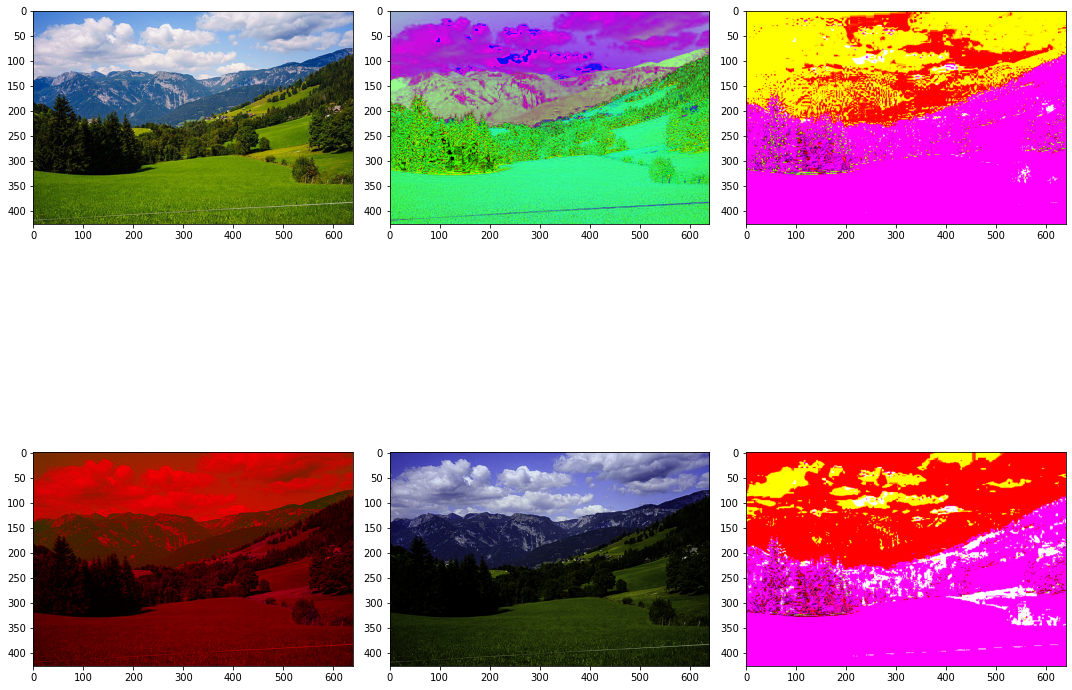

In [14]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt

# Import relevant functions from skimage
from skimage.color import rgb2hsv
from skimage.color import rgb2lab
from skimage.color import rgb2yuv
from skimage.color import rgb2xyz
from skimage.color import rgb2luv

# load image 'landscape.jpg' as pixel array
f1_img = img.imread('landscape.jpg')

# convert image 'f1_img' int different color maps from rgb
f2_img = rgb2hsv(f1_img) # into HSV
f3_img = rgb2lab(f1_img) # into LAB
f4_img = rgb2yuv(f1_img) # into YUV
f5_img = rgb2xyz(f1_img) # into XYZ
f6_img = rgb2luv(f1_img) # into LUV


# display all arrays of pixels as images (original and transformed)
fig, axs = plt.subplots(2,3, figsize=(15,15))
axs[0,0].imshow(f1_img)
axs[0,1].imshow(f2_img)
axs[0,2].imshow(f3_img)
axs[1,0].imshow(f4_img)
axs[1,1].imshow(f5_img)
axs[1,2].imshow(f6_img)
fig.tight_layout()

##  Image segmentation by different color spaces

<a id='Task3.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3.2. 

<p>Complete the code below to apply k-means clustering separately to different color spaces (for all images calculated above i.e., original and all transformed images). Hint: use function "kmeans_clustering" represented in tutorial section above. Use 4 cluster and pixel level features (e.g., in RGB each pixel is presented as 3-dimensional vector). Plot the segmented images. </p>

</div>

In [30]:
# make feature vectors from the pixels 
# print(f1_img.shape)
# print(f1_img[0])
print(f1_img[:,:,0])

k = 4 # number of clusters to form

# Perform k-means clustering on all six images seperatly and compute resulting images
## Your code here
res_img1 = 'not implemented yet'
## Your code here
res_img2 = 'not implemented yet'
## Your code here
res_img3 = 'not implemented yet'
## Your code here
res_img4 = 'not implemented yet'
## Your code here
res_img5 = 'not implemented yet'
## Your code here
res_img6 = 'not implemented yet'

# Plot all k-means clustering resulting images
## Your code here

[[ 55  56  57 ... 139 134 126]
 [ 56  56  57 ... 135 128 120]
 [ 56  57  58 ... 131 120 112]
 ...
 [ 49  66  84 ...  16  59  73]
 [ 26  40  79 ...  39  73  48]
 [ 40  22  47 ...  43  68  34]]


###  Image segmentation by fusion of color spaces

<a id='Task3.3'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 3.3. 

<p>Complete the code below to apply k-means clustering to fuse the results of different color spaces from previous tasks. Concatenate the clustering results from each k-means model to joint feature vector. Normalize features between 0 and 1. Plot the original image and fused segmented image.</p>

</div>

In [ ]:
# concatenate cluster features to joint feature presentation (Output size should be (273280, 6) with 6 dimensions corresponding to 6 colour spaces)
X = 'not implemented yet'

# normalize 0 to 1 (0-3 clusters)
## Your code here

# Perform k-means clustering on fused image and compute resulting image
## Your code here
res_img = 'not implemented yet'

# Plot original and k-means clustering resulting image
## Your code here

## 4. Radiometric Normalization

### Introduction

In this assigment, different readimetric scaling approaches are studied using [heart disease dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease). For the background, take a look at fourth part of Lecture 4 (radiometric normalization). Also, Chapter 8. in course book is relevant.

### Dataset

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('heart-disease.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


### Scales of measurements

<a id='Task4.1'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.1. 

<p>Run the code below and answer the questions below.</p>

- What are the different scales of measurement types?
- What are the scales of variables below? 

Variables are introduced in https://archive.ics.uci.edu/ml/datasets/heart+disease
</div>

In [32]:
data[['age','sex','trestbps','chol']].head(10)

,age,sex,trestbps,chol
0,63.0,1.0,145.0,233.0
1,67.0,1.0,160.0,286.0
2,67.0,1.0,120.0,229.0
3,37.0,1.0,130.0,250.0
4,41.0,0.0,130.0,204.0
5,56.0,1.0,120.0,236.0
6,62.0,0.0,140.0,268.0
7,57.0,0.0,120.0,354.0
8,63.0,1.0,130.0,254.0
9,53.0,1.0,140.0,203.0


nominal, ordinal, interval, and ratio

age: ratio
sex: nominal
trestbps: ratio
chol: ratio

### Degree-of-similarity scales

In [33]:
subdata = data[['age','trestbps', 'chol']].head(5)
subdata

,age,trestbps,chol
0,63.0,145.0,233.0
1,67.0,160.0,286.0
2,67.0,120.0,229.0
3,37.0,130.0,250.0
4,41.0,130.0,204.0


#### Eculidean distance

<a id='Task4.2'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.2. 

<p>Complete the code below to calculate euclidean distance based similarity matrix for 'subdata'.</p> 

</div>

In [73]:
def euclidean_distance(a, b):
    ## Your code here
    distance_matrix = (np.sum(a-b)**2)**(1/2)
    return distance_matrix

d = subdata.to_numpy()
distance_matrix = np.zeros((5, 5))
for i in range(distance_matrix.shape[0]):
    for j in range(distance_matrix.shape[1]):
#         print(d[i,:])
        distance_matrix[i,j] = euclidean_distance(d[i,:], d[j,:])
print('Euclidean distances: \n', distance_matrix)

Euclidean distances: 
 [[  0.  72.  25.  24.  66.]
 [ 72.   0.  97.  96. 138.]
 [ 25.  97.   0.   1.  41.]
 [ 24.  96.   1.   0.  42.]
 [ 66. 138.  41.  42.   0.]]


#### City-block distance distance

<a id='Task4.3'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.3. 

<p>Complete the code below to calculate city-block distance based similarity matrix for 'subdata'.</p>

</div>

In [74]:
def city_block_distance(a, b):
    ## Your code here
    distance_matrix = np.sum(abs(a-b))
    return distance_matrix

d = subdata.to_numpy()
distance_matrix = np.zeros((5, 5))
for i in range(distance_matrix.shape[0]):
    for j in range(distance_matrix.shape[1]):
        distance_matrix[i,j] = city_block_distance(d[i,:], d[j,:])
print('City-block distances: \n', distance_matrix)

City-block distances: 
 [[  0.  72.  33.  58.  66.]
 [ 72.   0.  97.  96. 138.]
 [ 33.  97.   0.  61.  61.]
 [ 58.  96.  61.   0.  50.]
 [ 66. 138.  61.  50.   0.]]


#### Chebyshev distance

<a id='Task4.4'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.4. 

<p>Complete the code below to calculate Chebyshev distance based similarity matrix.</p>

</div>

In [75]:
def chebyshev_distance(a, b):
    ## Your code here
    distance_matrix = max(abs(a-b))
    return distance_matrix

d = subdata.to_numpy()
distance_matrix = np.zeros((5, 5))
for i in range(distance_matrix.shape[0]):
    for j in range(distance_matrix.shape[1]):
        distance_matrix[i,j] = chebyshev_distance(d[i,:], d[j,:])       
print('Chebyshev distances: \n', distance_matrix)

Chebyshev distances: 
 [[ 0. 53. 25. 26. 29.]
 [53.  0. 57. 36. 82.]
 [25. 57.  0. 30. 26.]
 [26. 36. 30.  0. 46.]
 [29. 82. 26. 46.  0.]]


### Parametric normalization

#### Z-transform scaling

<a id='Task4.5'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.5. 

<p>Complete the code below to calculate Z-transfrom scaling from given data, i.e., zero mean unit standard deviation scaling.</p>

</div>

In [96]:
subdata = data[['age','trestbps', 'chol']]
# print(np.mean(subdata))
subdata['age'].head(10)
def z_transform(data):
    ## Your code here
    muu = np.mean(data)
    sigma = np.std(data)
#     print(muu)
#     print(sigma)
    scaled_data = [data[d].values for d in data]
#     print(len(scaled_data[0]))
    scaled_data
    return scaled_data
    
scaled_data = z_transform(subdata) 
# scaled_data.head(10)

303


#### Min-Max scaling

<a id='Task4.6'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.6. 

<p>Complete the code below to calculate min-max scaling for given data.</p>

</div>

In [ ]:
subdata = data[['age','trestbps', 'chol']]

def min_max(data):
    ## Your code here
    scaled_data = 'not implemented yet'
    return scaled_data


scaled_data = min_max(subdata)
scaled_data.head(10)

### Ranking

<a id='Task4.7'></a>
<div class=" alert alert-warning">
    <b>Assignment.</b> Problem 4.7. 

<p>Complete the code below to calculate ranking of given age variable.</p> 

</div>

In [2]:
x = data['age']

## Your code here